<a href="https://colab.research.google.com/github/keilabcs/ES-TAES-2020-1/blob/master/T_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Universidade Federal de Pernambuco
#### Pós-Graduação em Ciências da Computação - Cin/UFPE

Discentes

*   Keila Barbosa
*   Denini Gabriel
*   Irvin Bezerra

------------------------------------------------------------------

### Teste de normalidade dos dados

Um ponto de decisão importante ao trabalhar com uma amostra de dados é usar métodos estatísticos paramétricos ou não paramétricos.

Os métodos estatísticos paramétricos assumem que os dados têm uma distribuição conhecida e específica, geralmente uma distribuição Gaussiana. Se uma amostra de dados não for gaussiana, as suposições dos testes estatísticos paramétricos são violadas e métodos estatísticos não paramétricos devem ser usados.

Existem várias técnicas que você pode usar para verificar se sua amostra de dados se desvia de uma distribuição gaussiana, chamados de testes de normalidade.

Verificar se a amostra de dados é gaussiana ou suficientemente semelhante a gaussiana para usar as técnicas padrão, ou suficientemente não gaussiana para usar métodos estatísticos não paramétricos.

https://www.inf.ufsc.br/~andre.zibetti/probabilidade/normal.html

In [ ]:
If Data Is Gaussian:
	Use Parametric Statistical Methods
Else:
	Use Nonparametric Statistical Methods

Importando os módulos

In [2]:
from numpy.random import randn
from numpy import mean
from numpy import std
import csv, sys
from matplotlib import pyplot
import glob
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Leia o csv

In [3]:
uploaded = files.upload()

Saving new_results.csv to new_results.csv
Saving rank.csv to rank.csv
Saving opnioes.csv to opnioes.csv
Saving ranking.csv to ranking.csv
Saving results.csv to results.csv
Saving resumo_estados.csv to resumo_estados.csv
Saving resumo_respostas.csv to resumo_respostas.csv


In [4]:
ls

new_results.csv  rank.csv     results.csv         resumo_respostas.csv
opnioes.csv      ranking.csv  resumo_estados.csv  sample_data/


In [5]:
data = pd.read_csv('new_results.csv')
data.head(10)

,build,mismanaging,rework,unnecessarily,extraneous,psychological,waiting,knowledge,ineffective
0,3,3,3,1,3,0,0,2,3
1,3,1,2,1,3,3,3,0,2
2,2,2,2,2,2,2,1,2,2
3,3,1,1,2,2,1,2,1,2
4,2,3,3,3,3,3,2,3,3
5,2,3,3,1,3,2,1,3,2
6,1,1,2,1,2,0,1,3,1
7,3,2,2,1,3,2,1,3,1
8,3,3,3,3,1,1,0,2,2
9,3,3,2,2,3,1,2,2,3


In [6]:
data = 5 * randn(100) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.353 stdv=5.550


### Análise descritiva dos dados

Box-plot e Histograma da amostra ssimetria na distribuição dos dados.

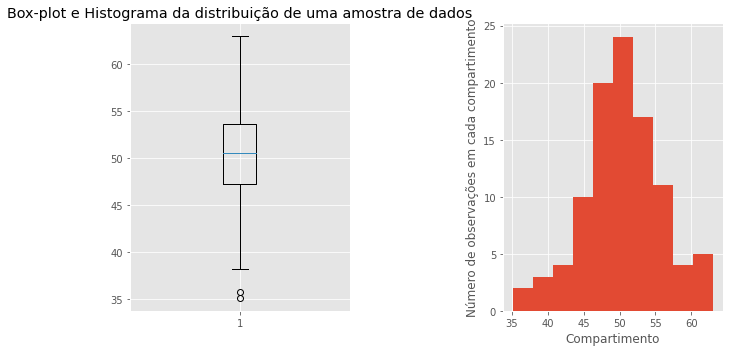

In [7]:
# Define o stilo para ggplot
plt.style.use("ggplot")

# Cada plot terá o mesmo tamanho de figuras (10,5)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

# Creating plot 
plt.subplot(1, 2, 1)
plt.boxplot(data) 
plt.title('Box-plot e Histograma da distribuição de uma amostra de dados')

# Histogram plot
plt.subplot(1, 2, 2)
pyplot.hist(data)

plt.xlabel("Compartimento", fontsize=12)  
plt.ylabel("Número de observações em cada compartimento", fontsize=12)

plt.tight_layout()
pyplot.show()

Gráfico popular para verificar a distribuição de uma amostra de dados é o gráfico quantil-quantil, gráfico QQ ou gráfico QQ, para abreviar.

Cada ponto de dados na amostra é emparelhado com um membro semelhante da distribuição idealizada na mesma distribuição cumulativa.

Os pontos resultantes são plotados como um gráfico de dispersão com o valor idealizado no eixo x e a amostra de dados no eixo y.

Gráfico QQ mostrando o gráfico de dispersão de pontos em uma linha diagonal, ajustando-se ao padrão diagonal esperado para uma amostra de uma distribuição gaussiana.

Existem alguns pequenos desvios, especialmente na parte inferior do gráfico, o que é esperado dada a pequena amostra de dados.

Text(0.5, 1.0, 'Distribuição Gaussiana')

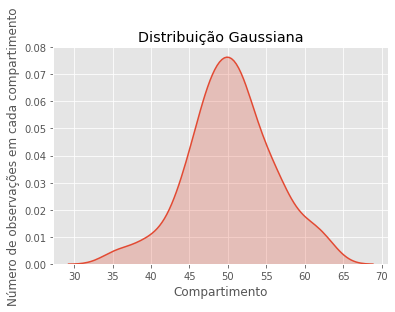

In [8]:
import numpy as np
plt.style.use("ggplot")

# Creating plot 
sns.kdeplot(data, shade=True)
plt.xlabel("Compartimento", fontsize=12)  
plt.ylabel("Número de observações em cada compartimento", fontsize=12)
plt.title("Distribuição Gaussiana")

<function matplotlib.pyplot.figure>

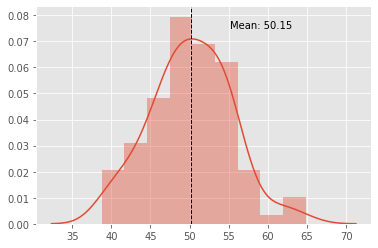

In [34]:
# Creating plot 
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=1)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
  
    return plt.figure
plot_distribution(data)


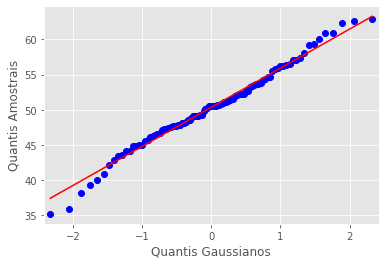

In [10]:
from statsmodels.graphics.gofplots import qqplot
# q-q plot
qqplot(data, line='s')
plt.xlabel("Quantis Gaussianos", fontsize=12)  
plt.ylabel("Quantis Amostrais", fontsize=12)
pyplot.show()

Os testes assumem que a amostra foi retirada de uma distribuição gaussiana. 
Tecnicamente, isso é chamado de hipótese nula ou H0. 
Um nível de limite é escolhido chamado alfa, normalmente 5% (ou 0,05), que é usado para interpretar o valor p.

*   p <= alfa : rejeita H0, não normal.
*   p> alfa : falha ao rejeitar H0, normal.

Isso significa que, em geral, estamos buscando resultados com um valor p maior para confirmar que nossa amostra foi provavelmente extraída de uma distribuição gaussiana.

Um resultado acima de 5% não significa que a hipótese nula seja verdadeira. Isso significa que é muito provável, dadas as evidências disponíveis.


In [11]:
# Teste Shapiro-Wilk
from scipy.stats import shapiro

# Teste de normalidade
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretar
alpha = 0.05
if p > alpha:
	print('A amostra parece gaussiana (falhar em rejeitar H0)')
else:
	print('A amostra não parece gaussiana(rejeitar H0)')

Statistics=0.988, p=0.520
A amostra parece gaussiana (falhar em rejeitar H0)


O valor p é interpretado em relação a um alfa de 5% e descobre que o conjunto de dados de teste não se desvia significativamente do normal.

In [12]:
# Teste K ^ 2 de D'Agostino
from scipy.stats import normaltest

# Teste de normalidade
stat, p = normaltest(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretar
alpha = 0.05
if p > alpha:
	print('A amostra parece gaussiana (falhar em rejeitar H0)')
else:
	print('A amostra não parece gaussiana(rejeitar H0)')

Statistics=0.905, p=0.636
A amostra parece gaussiana (falhar em rejeitar H0)


Teste Anderson-Darling

In [13]:
# Teste Anderson-Darling
from scipy.stats import anderson

# Gerar observações univariadas
data = 5 * randn(100) + 50

# Teste de normalidade
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, Os dados parecem normais (falha ao rejeitar H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, Os dados não parecem normais (rejeitar H0)' % (sl, cv))

Statistic: 0.197
15.000: 0.555, Os dados parecem normais (falha ao rejeitar H0)
10.000: 0.632, Os dados parecem normais (falha ao rejeitar H0)
5.000: 0.759, Os dados parecem normais (falha ao rejeitar H0)
2.500: 0.885, Os dados parecem normais (falha ao rejeitar H0)
1.000: 1.053, Os dados parecem normais (falha ao rejeitar H0)


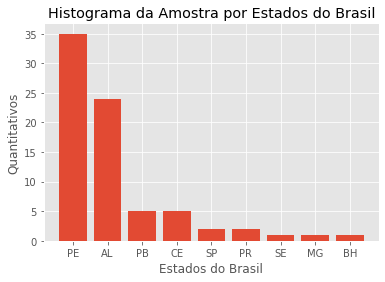

In [14]:
# Rank por Estados do Brasil

plt.style.use("ggplot")

plt.xlabel("Estados do Brasil", fontsize=12)  
plt.ylabel("Quantitativos", fontsize=12)
plt.title('Histograma da Amostra por Estados do Brasil')

grupos = ['PE', 'AL', 'PB', 'CE', 'SP', 'PR', 'SE', 'MG', 'BH']
valores = [35, 24, 5, 5, 2, 2, 1, 1,1 ]
plt.bar(grupos, valores)
plt.show()

# Análises dos Resultados

Resultados T-testes

In [15]:
# Ranking Geral
ranking = pd.read_csv('ranking.csv')
ranking.head()

,build,mismanaging,rework,unnecessarily,extraneous,psychological,waiting,knowledge,ineffective
0,3,4,4,1,2,5,2,4,4


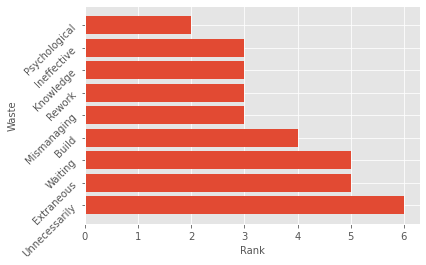

In [17]:
# Ranking Geral por desperdícios

plt.style.use("ggplot")

plt.xlabel("Rank", fontsize=10)  
plt.ylabel("Waste", fontsize=10)
#plt.title('Ranking Geral por desperdícios')

grupos2 = [ 'Unnecessarily', 'Extraneous', 'Waiting', 'Build', 'Mismanaging', 'Rework', 'Knowledge', 'Ineffective', 'Psychological']
valores2 = [6, 5, 5, 4, 3, 3, 3, 3, 2]

plt.barh(grupos2, valores2)
plt.yticks(rotation=45)

plt.show()
#plt.bar(grupos2, valores2)

In [ ]:
# Ranking Geral por ganho de pareação

plt.style.use("ggplot")

plt.xlabel("Rank", fontsize=10)  
plt.ylabel("Waste", fontsize=10)
#plt.title('Ranking Geral por desperdícios')

gruposx = ['Build', 'Mismanaging', 'Rework', 'Unnecessarily', 'Extraneous', 'Psychological', 'Waiting', 'Knowledge', 'Ineffective']
valoresx = [3, 4, 4, 1, 2, 5, 2, 4, 4]

plt.barh(gruposx, valoresx)
plt.yticks(rotation=45)

plt.show()
#plt.bar(gruposx, valoresx)

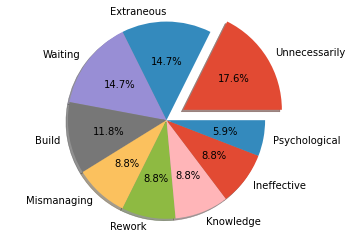

In [20]:
#Gráfico de Pizza

# define o nível de separabilidade entre as partes, ordem do vetor representa as partes
explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0) 
labels=grupos2

#define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
plt.pie(valores2, labels=grupos2, autopct='%1.1f%%', shadow=True, explode=explode)

# inseri a legenda e a localização da legenda.
#plt.legend(labels, loc=3)

#plt.title('Percentagem do Ranking Geral por desperdícios')

# define que o gráfico será plotado em circulo
plt.axis('equal')

plt.show()

In [21]:
# Resumo das Respostas
resumo_respostas = pd.read_csv('resumo_respostas.csv')
resumo_respostas.head()

,pergunta,Nunca observei,Observo raramente,Observo ocasionalmente,frequência
0,build,11,20,26,18
1,mismanaging,5,17,26,27
2,rework,6,10,34,25
3,unnecessarily,9,30,27,9
4,extraneous,2,14,22,37


In [24]:
base = pd.read_csv('rank.csv')
base.head()

,waste,rank,candidate,State
0,build,1,1,PE
1,mismanaging,1,1,PE
2,rework,1,1,PE
3,unnecessarily,3,1,PE
4,extraneous,1,1,PE


In [22]:
pip install plotly

In [25]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

waste = base['waste']
rank = base['rank']

df_fitbit_activity = pd.DataFrame(
    {'waste': waste, 'rank': rank})
df_fitbit_activity.head()

,waste,rank
0,build,1
1,mismanaging,1
2,rework,1
3,unnecessarily,3
4,extraneous,1


In [ ]:
df_fitbit_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 674 entries, 0 to 673
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   waste   674 non-null    object
 1   rank    674 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.7+ KB


In [ ]:
df_fitbit_activity.index

RangeIndex(start=0, stop=674, step=1)

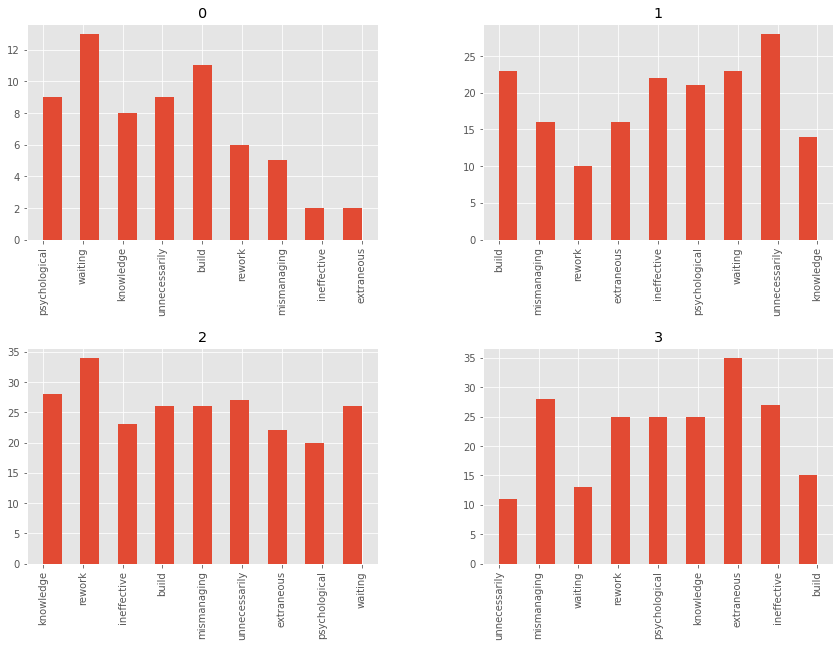

In [52]:
# Nunca observei = 0
# Observo raramente = 1	
# Observo ocasionalmente = 2	
# Observo frequência = 3

import pandas as pd
import sqlalchemy
import matplotlib.pyplot as plt 
plt.style.use("ggplot")
from numpy.random import random

df = df_fitbit_activity
df_fitbit_activity.hist(column="waste",by="rank", bins=17, figsize=(14,10),  linestyle='dashed')
#plt.yticks(range(0, 35)) # mudar escala do eixo X

#colors = ['b', 'y', 'm', 'r']
#lo = plt.scatter(random(10), random(10), marker='o', color=colors[3])
#ll = plt.scatter(random(10), random(10), marker='o', color=colors[3])
#l  = plt.scatter(random(10), random(10), marker='o', color=colors[3])
#a  = plt.scatter(random(10), random(10), marker='o', color=colors[3])
#plt.legend((lo, ll, l, a),
#           ('Nunca observei = 0','Observo raramente = 1','Observo ocasionalmente = 2','Observo frequência = 3'),
#           scatterpoints=1,
#           loc='upper center',
#           ncol=2,
#           fontsize=10)

plt.show()

O gráfico de BoxPlot se caracteriza como um retângulo que pode ser horizontal ou vertical com duas retas na parte superior e inferior.

O retângulo é formado por três Quartis que dividem o dados em quatro rols com 25% dos dados cada.

Inicialmente o conjunto de dados é dividido ao meio através do cálculo da mediana dos valores, que será o valor do Quartil 2 representado pela linha ao meio do retângulo.

Com os dados divididos em duas partes o Quartil 1 é representado pela linha da borda inferior do retângulo que representa o valor médio dos 25% dos dados. E o Quartil 3 é representado pela linha da borda superior do retângulo que representa o valor médio dos 75% dos dados.

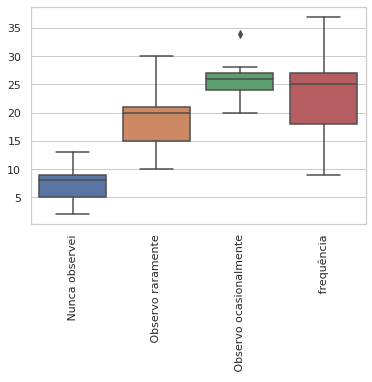

In [ ]:
%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")

sns.set(style="whitegrid", color_codes=True)
peso = resumo_respostas
plt.xticks(rotation=90)
sns.boxplot(data=peso);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kern

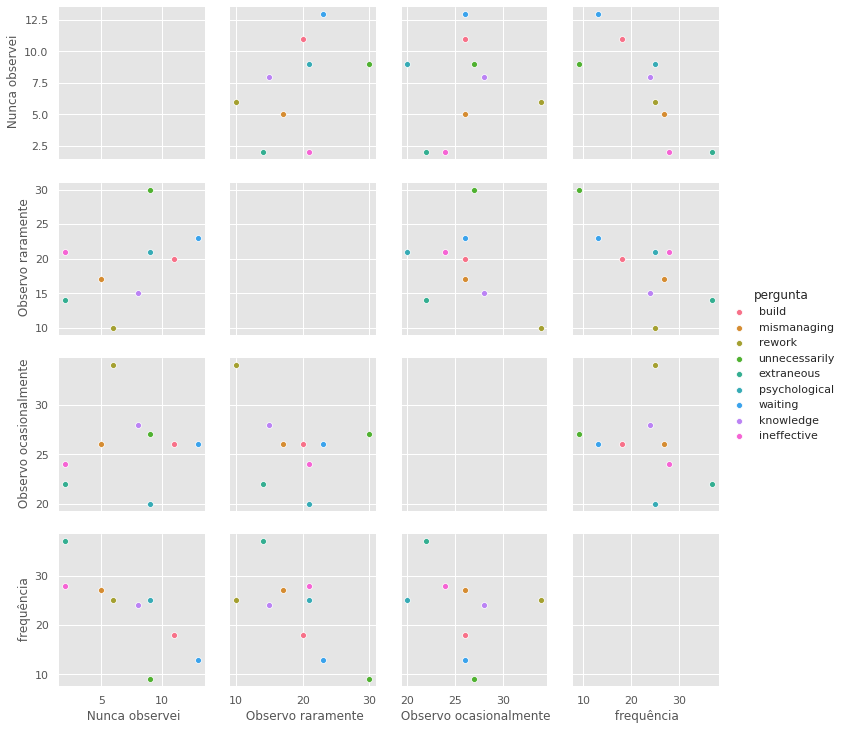

In [ ]:
# Gráfico de dispersão com os atributos par a par de toda a base de dados

%matplotlib inline
import seaborn as sns
plt.style.use("ggplot")

peso = resumo_respostas
sns.pairplot(peso, hue="pergunta");


In [ ]:
!pip install plotly
!pip install chart_studio
!pip install researchpy

     |████████████████████████████████| 71kB 2.0MB/s 


O **teste T independente** é um teste paramétrico usado para testar uma diferença estatisticamente significativa nas médias entre 2 grupos. Como acontece com todos os testes paramétricos, existem certas condições que precisam ser atendidas para que os resultados do teste sejam considerados confiáveis.

In [ ]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats

df = pd.read_csv('rank.csv')
df.head(10)

,waste,rank,candidate,State
0,build,1,1,PE
1,mismanaging,1,1,PE
2,rework,1,1,PE
3,unnecessarily,3,1,PE
4,extraneous,1,1,PE
5,psychological,0,1,PE
6,waiting,0,1,PE
7,knowledge,2,1,PE
8,ineffective,1,1,PE
9,build,1,2,PE


In [ ]:
summary, results = rp.ttest(group1= df['rank'][df['waste'] == 'build'], group1_name= "build",
                            group2= df['rank'][df['waste'] == 'mismanaging'], group2_name= "mismanaging")
                            
print(summary)


      Variable      N      Mean        SD        SE  95% Conf.  Interval
0        build   75.0  1.600000  0.972598  0.112306   1.376226  1.823774
1  mismanaging   75.0  2.026667  0.929594  0.107340   1.812787  2.240547
2     combined  150.0  1.813333  0.972002  0.079364   1.656510  1.970157


In [ ]:
print(results)

                    Independent t-test   results
0  Difference (build - mismanaging) =    -0.4267
1                Degrees of freedom =   148.0000
2                                 t =    -2.7464
3             Two side test p value =     0.0068
4            Difference < 0 p value =     0.0034
5            Difference > 0 p value =     0.9966
6                         Cohen's d =    -0.4485
7                         Hedge's g =    -0.4462
8                     Glass's delta =    -0.4387
9                                 r =     0.2202
